In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("input.csv",index_col=0)
df.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
Sample ID,,,,,
1,7.25,23.1,4.5,7.8,342
2,7.11,22.3,5.1,6.2,335
3,7.03,21.5,3.9,8.3,356
4,7.38,22.9,3.2,9.5,327
5,7.45,20.7,3.8,8.1,352


<AxesSubplot:ylabel='Sample ID'>

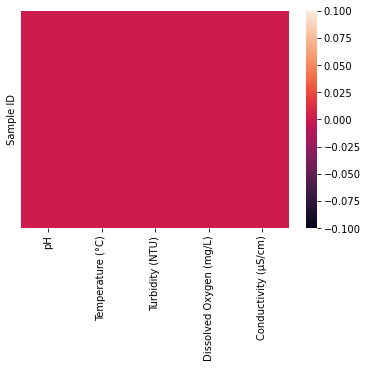

In [7]:
sns.heatmap(df.isnull(),yticklabels=False)

In [8]:
df.isnull().sum()

pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

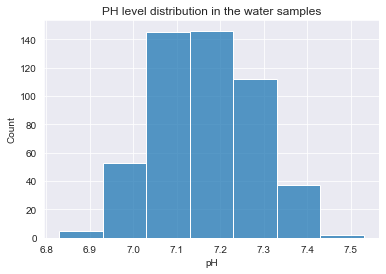

In [9]:
sns.set_style("darkgrid")
sns.histplot(data=df,x="pH",binwidth=0.1)
plt.title("PH level distribution in the water samples")
plt.show()

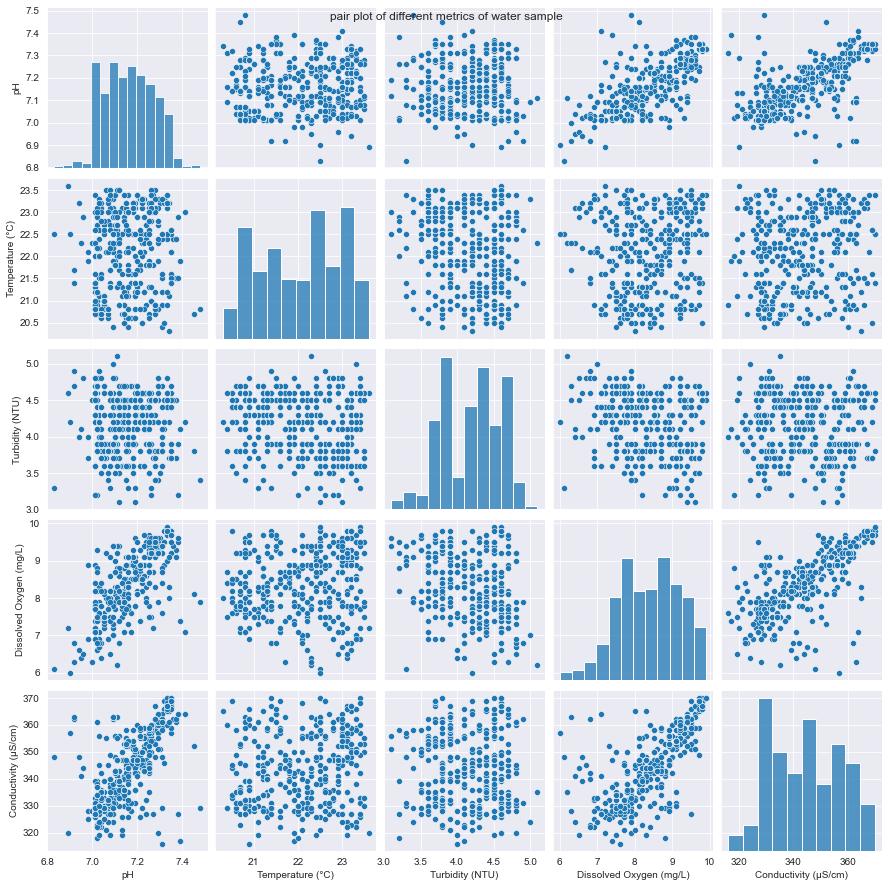

In [10]:
sns.pairplot(df)
plt.suptitle("pair plot of different metrics of water sample")
plt.show()

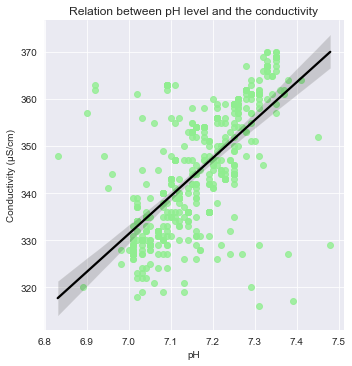

In [11]:
sns.lmplot(data=df,x="pH",y="Conductivity (µS/cm)",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between pH level and the conductivity")
plt.show()

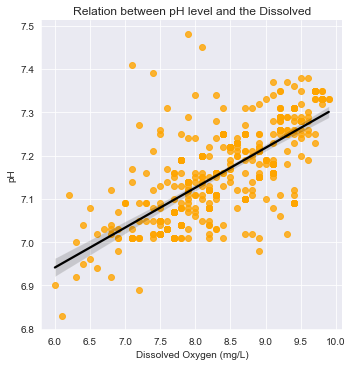

In [12]:
sns.lmplot(data=df,x="Dissolved Oxygen (mg/L)",y="pH",scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between pH level and the Dissolved")
plt.show()

In [13]:
# Using the Kmeans Model to classify the water sample into 3 category

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

StandardScaler(copy=True,with_mean=True,with_std=True)

sampled_scaler = scaler.transform(df)

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=2023)

cluster = model.fit_predict(sampled_scaler)

In [16]:
level = pd.Series(cluster)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


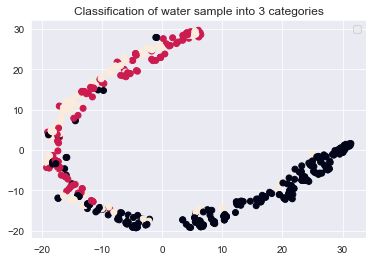

In [17]:
from sklearn.manifold import TSNE

model = TSNE()

transformed_model = model.fit_transform(df)

xs = transformed_model[:,0]
ys =transformed_model[:,1]

plt.scatter(xs,ys,c=level)
plt.title("Classification of water sample into 3 categories")
plt.legend()
plt.show()

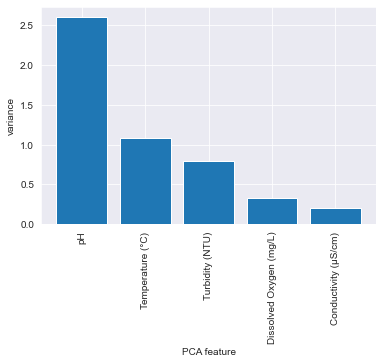

In [18]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features,df.columns)
plt.xticks(rotation=90)
plt.show()

In [19]:
df['classification'] = cluster
df.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
Sample ID,,,,,,
1,7.25,23.1,4.5,7.8,342,1
2,7.11,22.3,5.1,6.2,335,0
3,7.03,21.5,3.9,8.3,356,0
4,7.38,22.9,3.2,9.5,327,2
5,7.45,20.7,3.8,8.1,352,1


In [20]:
df['classification'] = df['classification'].fillna(0)
df['classification'] = df['classification'].astype("int")
df['classification'] = df['classification'].map({0:'category1',1:'category2',2:'category3'})
df['classification'].value_counts()

category1    242
category3    143
category2    115
Name: classification, dtype: int64

In [21]:
# check the distribution of category in the samples

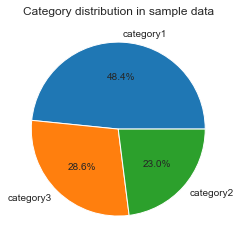

In [22]:
category = df['classification'].value_counts().reset_index(name='counts')
plt.pie(x=category['counts'],labels=category['index'],autopct='%1.1f%%')
plt.title("Category distribution in sample data")
plt.show()

<Figure size 1080x576 with 0 Axes>

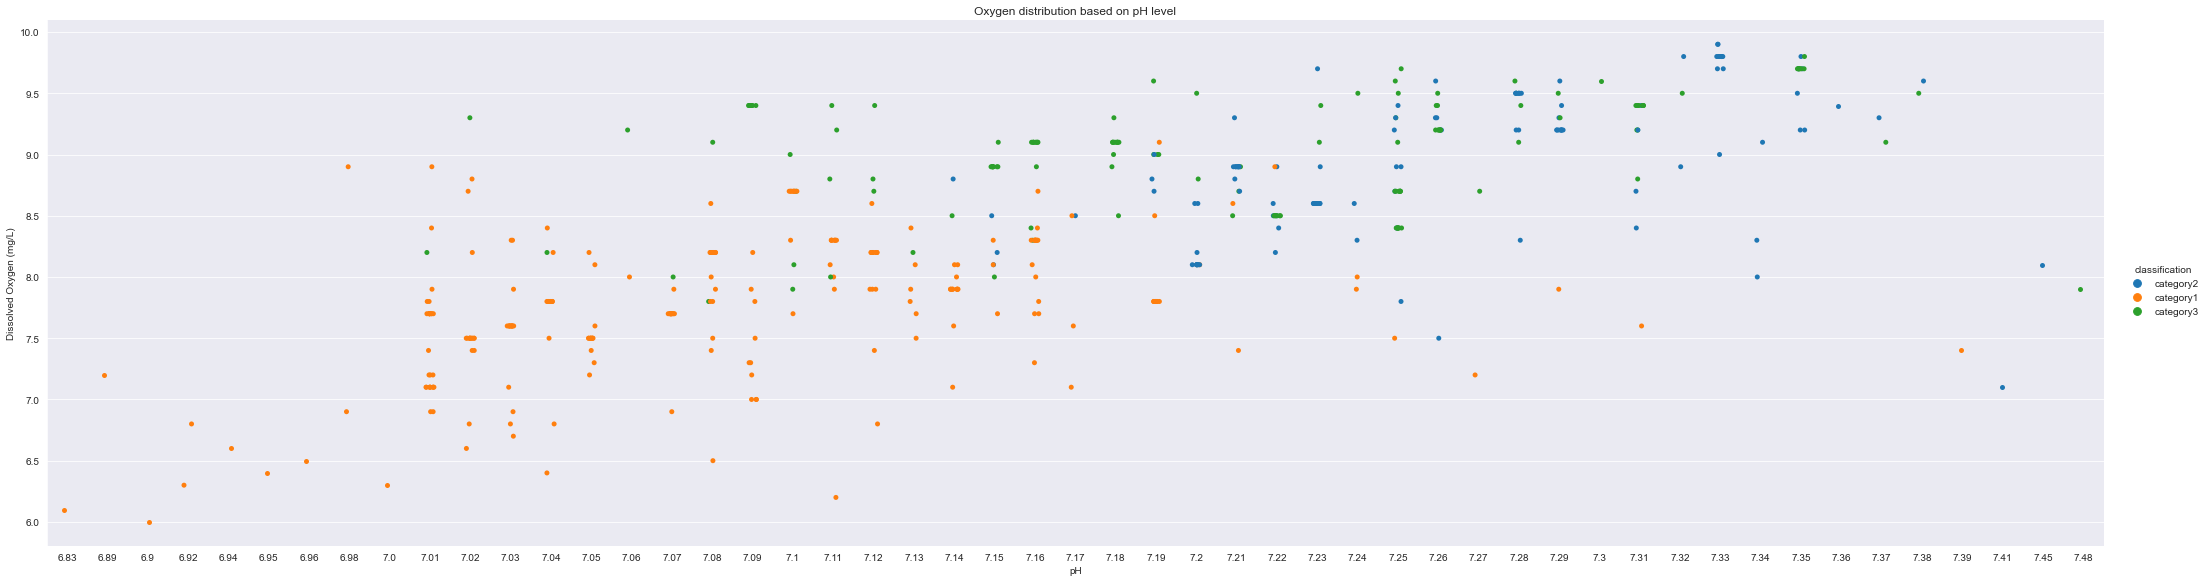

In [23]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,x="pH",y="Dissolved Oxygen (mg/L)",hue="classification",height=8,aspect=3.7)
plt.title("Oxygen distribution based on pH level")
plt.show()

<Figure size 1080x576 with 0 Axes>

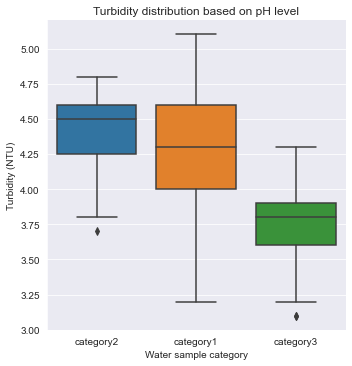

In [24]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,y="Turbidity (NTU)",x="classification",kind='box')
plt.title("Turbidity distribution based on pH level")
plt.xlabel("Water sample category")
plt.show()

In [25]:
# Distribution of 2 important features while diciding the sample classification

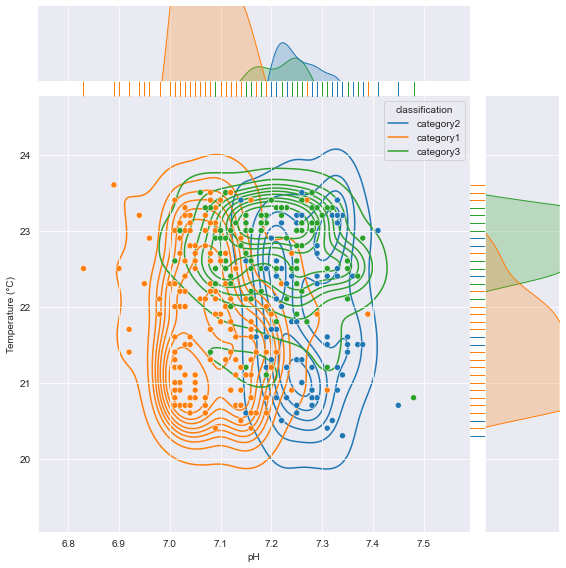

In [26]:
g = sns.jointplot(data=df,x="pH",y="Temperature (°C)",hue="classification",height=8)
g.plot_joint(sns.kdeplot,color='y',zorder=0)
g.plot_marginals(sns.rugplot,color='r',height=-0.2,clip_on=False)
plt.show()

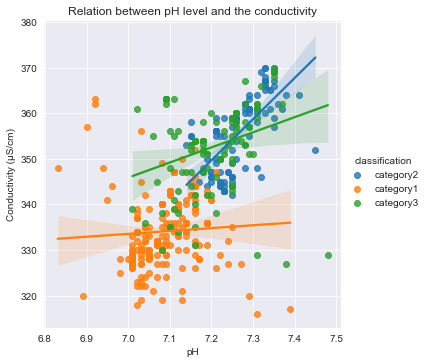

In [27]:
sns.lmplot(data=df,x="pH",y="Conductivity (µS/cm)",hue='classification')
plt.title("Relation between pH level and the conductivity")
plt.show()

In [28]:
df.groupby("classification")['Dissolved Oxygen (mg/L)'].mean()

classification
category1    7.741736
category2    8.964348
category3    8.997902
Name: Dissolved Oxygen (mg/L), dtype: float64

In [29]:
df.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
Sample ID,,,,,,
1,7.25,23.1,4.5,7.8,342,category2
2,7.11,22.3,5.1,6.2,335,category1
3,7.03,21.5,3.9,8.3,356,category1
4,7.38,22.9,3.2,9.5,327,category3
5,7.45,20.7,3.8,8.1,352,category2
